#Beta sensitivity testing
In this script I do a basic sensitivity analysis of the parameters beta and k.

 13.468974 seconds (222.24 M allocations: 11.681 GiB, 22.75% gc time)


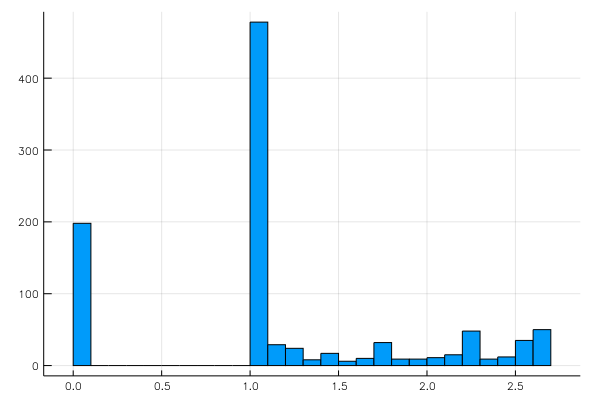

In [1]:
include("coinf_model.jl")

Values of beta for each species, based on trial and error:

In [2]:
b_N_a_full = linspace(5e-11, 5e-8, 10)
b_A_l_full = linspace(5e-11, 5e-8, 10)
b_T_t_full = linspace(5e-11, 5e-8, 10)

5.0e-11:5.55e-9:5.0e-8

Values of k for each species, based on fitted values of k from the Sri Lanka data:

In [3]:
k_N_a = [0.01, 0.2, 0.4]
k_A_l = [0.01, 0.2, 0.4]
k_T_t = [0.11, 0.21, 0.31]

3-element Array{Float64,1}:
 0.11
 0.21
 0.31

Get all combinations of the beta and k vaules for testing

In [4]:
N_a_tup = collect(Base.product(b_N_a_full,k_N_a))
A_l_tup = collect(Base.product(b_A_l_full,k_A_l))
T_t_tup = collect(Base.product(b_T_t_full,k_T_t))

10×3 Array{Tuple{Float64,Float64},2}:
 (5.0e-11, 0.11)   (5.0e-11, 0.21)   (5.0e-11, 0.31) 
 (5.6e-9, 0.11)    (5.6e-9, 0.21)    (5.6e-9, 0.31)  
 (1.115e-8, 0.11)  (1.115e-8, 0.21)  (1.115e-8, 0.31)
 (1.67e-8, 0.11)   (1.67e-8, 0.21)   (1.67e-8, 0.31) 
 (2.225e-8, 0.11)  (2.225e-8, 0.21)  (2.225e-8, 0.31)
 (2.78e-8, 0.11)   (2.78e-8, 0.21)   (2.78e-8, 0.31) 
 (3.335e-8, 0.11)  (3.335e-8, 0.21)  (3.335e-8, 0.31)
 (3.89e-8, 0.11)   (3.89e-8, 0.21)   (3.89e-8, 0.31) 
 (4.445e-8, 0.11)  (4.445e-8, 0.21)  (4.445e-8, 0.31)
 (5.0e-8, 0.11)    (5.0e-8, 0.21)    (5.0e-8, 0.31)  

Function to do the testing

In [5]:
sp_test = function(p_var, p, sp)

  eggs = zeros(Float64, 2000, length(p_var))

  for i in 1:length(p_var)

    p[sp].b = p_var[i][1]
    p[sp].k = p_var[i][2]

    #rr is 0 (if set run_record = 0 get record of whole run); a is ages
    rr, final_record, a = main(2000, 2000)
    eggs[:,i] = final_record[:EOut][:,sp]
  end

  return eggs
end

(::#38) (generic function with 1 method)

Each set of testing takes just under 2 minutes

In [6]:
@time N_a_b_sensitivity = sp_test(N_a_tup, SpPars, 1)
@time A_l_b_sensitivity = sp_test(A_l_tup, SpPars, 1)
@time T_t_b_sensitivity = sp_test(T_t_tup, SpPars, 1)

180.767311 seconds (4.54 G allocations: 176.001 GiB, 19.48% gc time)
174.264601 seconds (4.54 G allocations: 175.999 GiB, 19.67% gc time)
175.898556 seconds (4.54 G allocations: 175.999 GiB, 19.47% gc time)


2000×30 Array{Float64,2}:
 0.0      0.0              0.0        …     0.0               5.55635e-23
 0.0      0.0              0.0             44.4144            0.00201932 
 0.0      0.0              6.48218e5     1214.37              3.00097e-61
 0.0      0.0              0.0             81.6361            6.20182    
 0.0  94648.5              0.0              0.0               0.0        
 0.0      0.0           9063.48       …     6.16967e5     48643.7        
 0.0      0.00181735       0.0              0.0447503         3.80065e-6 
 0.0      0.0              2.00906e5        0.0               6.61621e5  
 0.0      6.36728e5        0.0              0.0               3.71508e-39
 0.0      0.0              4.06433e5        1.01839      267068.0        
 ⋮                                    ⋱                                  
 0.0      0.0              0.91813          2.66931e-10   12616.1        
 0.0      0.0              0.0           1755.35              2.03278e-24
 0.0  48887.

Need to scale the eggs to match the raw data. Egg output from model is all eggs that can be output
for 5 days (timestep = 1/73). Stool sample size if 54mg (0.054g). I assume 100g of stool per day,
therefore scale to per day (i/5) and then to correct concentration (* 0.00054)

In [7]:
scale_N_a_sensitivity = map(i -> i/5 * 0.00054, N_a_b_sensitivity)
scale_A_l_sensitivity = map(i -> i/5 * 0.00054, A_l_b_sensitivity)
scale_T_t_sensitivity = map(i -> i/5 * 0.00054, T_t_b_sensitivity)

2000×30 Array{Float64,2}:
 0.0   0.0          0.0          0.0          …   0.0           6.00086e-27
 0.0   0.0          0.0          0.0              0.00479676    2.18087e-7 
 0.0   0.0         70.0076       0.0              0.131152      3.24105e-65
 0.0   0.0          0.0          0.771568         0.00881669    0.000669797
 0.0  10.222        0.0          0.0295304        0.0           0.0        
 0.0   0.0          0.978856    34.521        …  66.6324        5.25352    
 0.0   1.96273e-7   0.0          5.34095e-14      4.83304e-6    4.1047e-10 
 0.0   0.0         21.6978       0.0              0.0          71.455      
 0.0  68.7667       0.0          0.0              0.0           4.01229e-43
 0.0   0.0         43.8947       0.0              0.000109986  28.8433     
 ⋮                                            ⋱                            
 0.0   0.0          9.91581e-5   0.0              2.88286e-14   1.36254    
 0.0   0.0          0.0          0.0              0.189577    

Using the fitdistr function from the MASS package in R - it's just easier. I have adapted the
function slightly, to handle all or almost all 0 data, see fitNB.R file.

In [8]:
using RCall
R"source('fitNB.R')"
@rget fit_nb

(::#33) (generic function with 1 method)

Get mu and k (or mu and size) from the simulated data. Firstly I fit the data using the function
above, I then prepare it for plotting and plot away.

The first plots are model sensitivity to beta and k for N. americanus.
For the simulated k - it's not completely surprising that the k that is simulated is a bit
different to the k that is given as a parameter, because the parameter k is fitted from EPG
and used in defining infective larvae acquisition, and the simulated k is from the egg output.
Target k for N. americanus is 0.08.

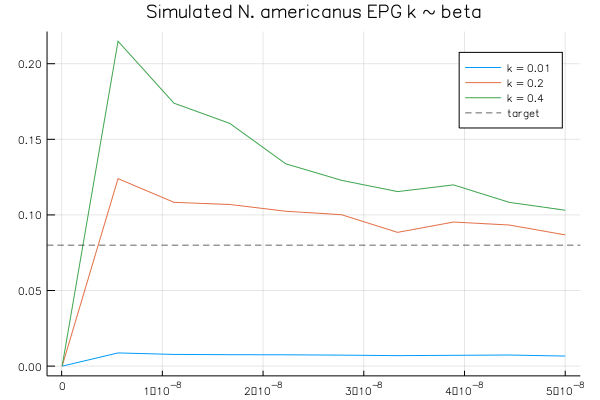

In [9]:
using Plots
N_a_size = hcat([fit_nb(round(scale_N_a_sensitivity[:,x]))[1] for x in 1:30])
N_a_size = hcat(N_a_size[1:10], N_a_size[11:20], N_a_size[21:30])
plot(b_N_a_full, N_a_size,
      title = "Simulated N. americanus EPG k ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([0.08], line = (1, :dash, 0.6, :black), label = :target)

Simulated mu for N. americanus look sensible, target N. a. mu is 6.9.

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,1}) at ./deprecated.jl:57
 [3] collect(::Base.Generator{UnitRange{Int64},##841.##48#49}) at ./array.jl:475
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] include_string(::Module, ::String) at /Users/hannah/.julia/v0.6/Compat/src/Compat.jl:90
 [6] (::Literate.Documenter.##2#3{Literate.##20#21{Module},Base.TTY,Base.TTY,Pipe,Array{UInt8,1}})() at /Users/hannah/.julia/v0.6/Literate/src/Documenter.jl:41
 [7] withoutput(::Literate.##20#21{Module}) at /Users/hannah/.julia/v0.6/Literate/src/Documenter.jl:39
 [8] execute_notebook(::Dict{Any,Any}) at /Users/hannah/.julia/v0.6/Literate/src/Literate.jl:500
 [9] #15 at /Users/hannah/.julia/v0.6/Literate/src/Literate.jl:466 [inlined]
 [10] cd(::Literate.##15#19, ::String) at ./file.jl:70
 [11] #notebook#11(::Base.#identity, ::Base.#identity, ::Bool, ::Bool, ::Bool, ::String, ::Array{Any,1}, ::Function, ::String, ::String) at /Users/hannah/

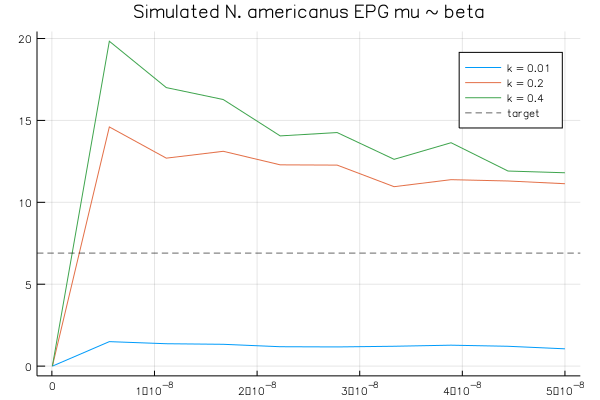

In [10]:
N_a_mu = hcat([fit_nb(round(scale_N_a_sensitivity[:,x]))[2] for x in 1:30])
N_a_mu = hcat(N_a_mu[1:10], N_a_mu[11:20], N_a_mu[21:30])
plot(b_N_a_full, N_a_mu,
      title = "Simulated N. americanus EPG mu ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([6.9], line = (1, :dash, 0.6, :black), label = :target)

Simulated Ascaris k. Target is 0.1.

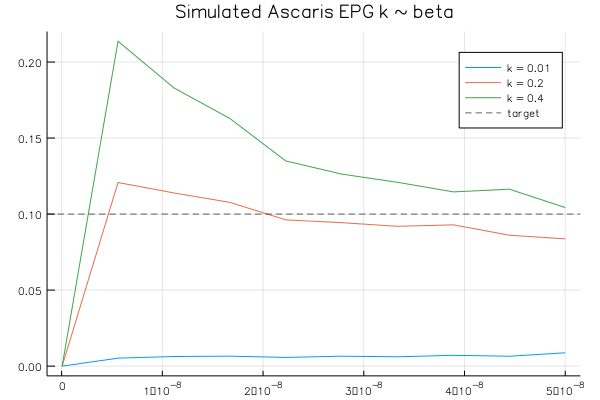

In [11]:
A_l_size = hcat([fit_nb(round(scale_A_l_sensitivity[:,x]))[1] for x in 1:30])
A_l_size = hcat(A_l_size[1:10], A_l_size[11:20], A_l_size[21:30])
plot(b_A_l_full, A_l_size,
      title = "Simulated Ascaris EPG k ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([0.1], line = (1, :dash, 0.6, :black), label = :target)

Simulated Ascaris mu. Target is 249.6

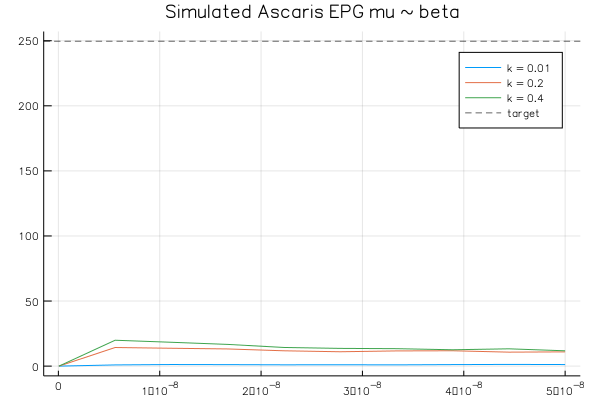

In [12]:
A_l_mu = hcat([fit_nb(round(scale_A_l_sensitivity[:,x]))[2] for x in 1:30])
A_l_mu = hcat(A_l_mu[1:10], A_l_mu[11:20], A_l_mu[21:30])
plot(b_A_l_full, A_l_mu,
      title = "Simulated Ascaris EPG mu ~ beta", label = ["k = 0.01", "k = 0.2", "k = 0.4"])
hline!([249.6], line = (1, :dash, 0.6, :black), label = :target)

Simulated Trichuris k; target is 0.21

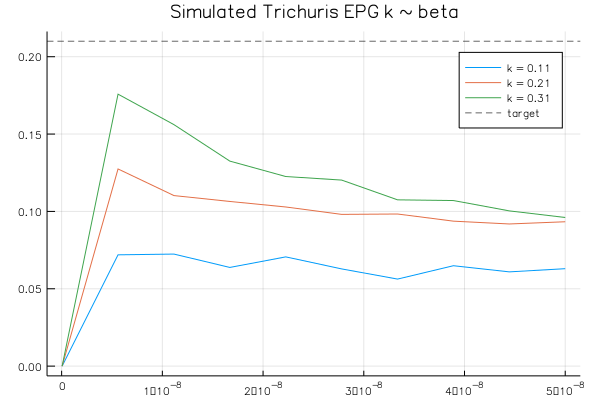

In [13]:
T_t_size = hcat([fit_nb(round(scale_T_t_sensitivity[:,x]))[1] for x in 1:30])
T_t_size = hcat(T_t_size[1:10], T_t_size[11:20], T_t_size[21:30])
plot(b_T_t_full, T_t_size,
      title = "Simulated Trichuris EPG k ~ beta", label = ["k = 0.11", "k = 0.21", "k = 0.31"])
hline!([0.21], line = (1, :dash, 0.6, :black), label = :target)

Simulated Trichuris mu; target 38.8

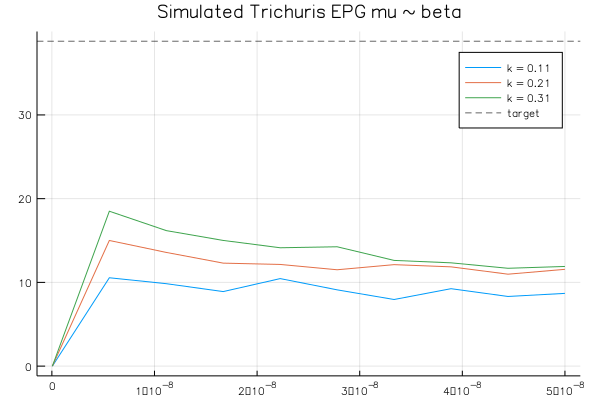

In [14]:
T_t_mu = hcat([fit_nb(round(scale_T_t_sensitivity[:,x]))[2] for x in 1:30])
T_t_mu = hcat(T_t_mu[1:10], T_t_mu[11:20], T_t_mu[21:30])
plot(b_T_t_full, T_t_mu,
      title = "Simulated Trichuris EPG mu ~ beta", label = ["k = 0.11", "k = 0.21", "k = 0.31"])
hline!([38.8], line = (1, :dash, 0.6, :black), label = :target)

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*